# CHAPTER 06 - DRAWING GEOMETRIC SHARES AND FRACTALS

## DRAWING GEOMETRIC SHAPES WITH MATPLOTIBLI´S PATCHES

In [2]:
import matplotlib.pyplot as plt

In [3]:
x = [1, 2, 3]
y = [1, 2, 3]

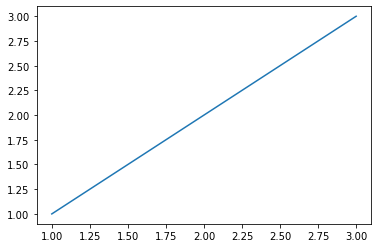

In [4]:
plt.plot(x, y)

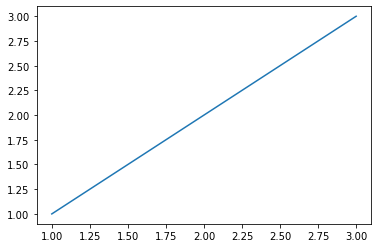

In [5]:
x = [1, 2, 3]
y = [1, 2, 3]
fig = plt.figure()
ax = plt.axes()
plt.plot(x,y)

## CREATING ANIMATED FIGURES

In [6]:
# A growting circle

In [7]:
from matplotlib import pyplot as plt
from matplotlib import animation

In [8]:
def create_circle():
    circle = plt.Circle((0, 0), 0.05)
    return circle

In [11]:
def update_radius(i, circle):
    circle.radius = 1*0.5
    return circle,

In [24]:
# apparently there is something wrong or possibly obsolete in this code

def create_animation():
    fig = plt.gcf()
    ax = plt.axes(xlim=(-10, 10), ylim=(-10, 10))
    ax.set_aspect('equal')
    circle = create_circle()
    ax.add_patch(circle)
    anim = animation.FuncAnimation(
        fig, update_radius, fargs=(circle,), frames=30, interval=50)
    plt.title('Simple Circle Animation')
    plt.show()

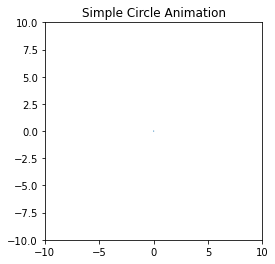

In [25]:
create_animation()

## ANIMATING A PROJETCTILE´S TRAJECTORY

In [29]:
'''
Animate the trajectory of an object in projectile motion
'''
# apparently there is something wrong or possibly obsolete in this code

from matplotlib import pyplot as plt
from matplotlib import animation
import math

g = 9.8

def get_intervals(u, theta):
    t_flight = 2*u*math.sin(theta)/g
    intervals = []
    start = 0
    interval = 0.005
    while start < t_flight:
        intervals.append(start)
        start = start + interval
    return intervals

def update_position(i, circle, intervals, u, theta):
    t = intervals[i]
    x = u*math.cos(theta)*t
    y = u*math.sin(theta)*t - 0.5*g*t*t
    circle.center = x, y
    return circle,

def create_animation(u, theta):
    intervals = get_intervals(u, theta)
    xmin = 0
    xmax = u*math.cos(theta)*intervals[-1]
    ymin = 0
    t_max = u*math.sin(theta)/g
    ymax = u*math.sin(theta)*t_max - 0.5*g*t_max**2
    fig = plt.gcf()
    ax = plt.axes(xlim=(xmin, xmax), ylim=(ymin, ymax))

    circle = plt.Circle((xmin, ymin), 1.0)
    ax.add_patch(circle)

    anim = animation.FuncAnimation(fig, update_position,
                                   fargs=(circle, intervals, u, theta),
                                   frames=len(intervals), interval=1,
                                   repeat=False)

    plt.title('Projectile Motion')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

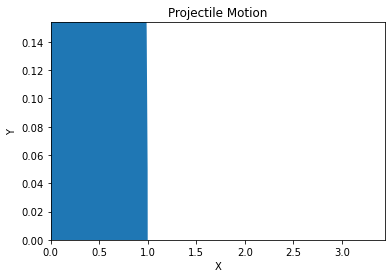

In [30]:
try:
    u = 10
    theta = 10
except ValueError:
    print('You entered an invalid input')
else:
    theta = math.radians(theta)
    create_animation(u, theta)

## DRAWING 

In [54]:
'''
Example of selecting a transformation from two equally probable
transformations
'''

import matplotlib.pyplot as plt
import random

def transformation_1(p):
    x = p[0]
    y = p[1]
    return x + 1, y - 1

def transformation_2(p):
    x = p[0]
    y = p[1]
    return x + 1, y + 1

def transform(p):
    # List of transformation functions
    transformations = [transformation_1, transformation_2]
    # Pick a random transformation function and call it
    t = random.choice(transformations)
    x, y = t(p)
    return x, y

def build_trajectory(p, n):
    x = [p[0]]
    y = [p[1]]
    for _ in range(n):
        p = transform(p)
        x.append(p[0])
        y.append(p[1])
    return x, y

        

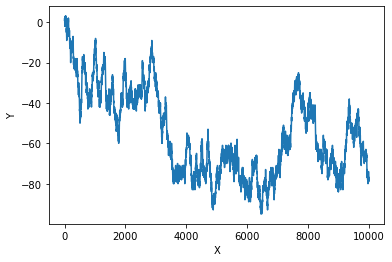

In [61]:
p = (1, 1)
n = 10000
x, y = build_trajectory(p, n)
# Plot
plt.plot(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()